<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
features type:<class 'numpy.ndarray'>
target type:<class 'numpy.ndarray'>
(150, 4)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


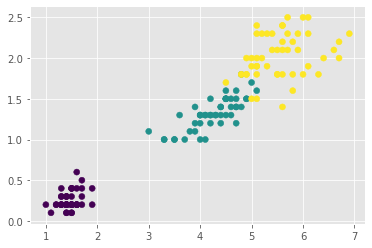

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from  sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize
from scipy.cluster.vq import vq, whiten
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram

#features: petal length, petal width, sepal length, sepal width
#target species: versicolor, virginica, setsoa
plt.style.use('ggplot')

iris=load_iris()

#bunch lets you use a python dict like an object
print(type(iris))
print(iris.keys())

#feature and target are numpy arrays
print('features type:' + str(type(iris.data)))
print('target type:' + str(type(iris.target)))
print(iris.data.shape)

X=iris.data
y=iris.target

labels=y

df=pd.DataFrame(X,columns=iris.feature_names)
print(df.head(5))

xs=df['petal length (cm)']
ys=df['petal width (cm)']

_=plt.scatter(xs,ys,c=labels)
plt.show()

points=np.column_stack((xs,ys))
#print(points)

In [22]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

print(model.inertia_)

new_points=np.random.permutation(points)

# Determine the cluster labels of new_points: labels
new_labels = model.predict(new_points)

# Print cluster labels of new_points
print(new_labels)


31.371358974358973
[2 1 0 0 1 0 2 2 0 0 2 1 0 2 2 0 0 0 2 1 0 1 0 2 1 2 2 1 2 2 0 1 1 1 0 0 2
 2 0 0 1 2 0 0 1 1 0 1 2 1 1 0 0 2 0 2 2 2 1 0 0 2 1 2 1 1 0 0 2 0 2 1 0 2
 1 2 2 0 0 1 2 2 2 0 1 0 1 2 0 1 1 1 0 1 2 1 1 0 2 0 1 1 1 1 0 0 2 0 2 0 2
 2 2 1 0 2 1 0 0 1 1 0 1 2 2 2 2 1 2 0 1 0 2 1 0 1 0 0 2 1 1 0 0 1 2 0 2 1
 1 1]


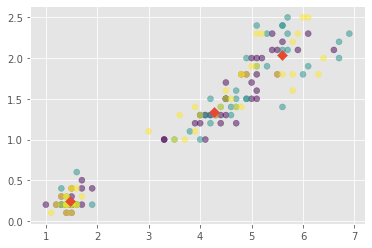

In [23]:
xs = new_points[:,0]
ys = new_points[:,1]

plt.clf()
# Make a scatter plot of xs and ys, using labels to define the colors
_=plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
_=plt.scatter(centroids_x,centroids_y, marker='D',s=50)
plt.show()


In [52]:
labels=iris.target
#print(labels)
species=[]
for i in range(0,len(labels)):
    if(labels[i]==0):
        species.append("versicolor")
    elif(labels[i]==1):
        species.append("virginica")    
    elif(labels[i]==2):
        species.append('setsoa')
 
#print(species)

df2=pd.DataFrame({'labels':labels, 'species':species})
#print(df2)
ct=pd.crosstab(df2['labels'],df2['species'])
print(ct)


species  setsoa  versicolor  virginica
labels                                
0             0          50          0
1             0           0         50
2            50           0          0


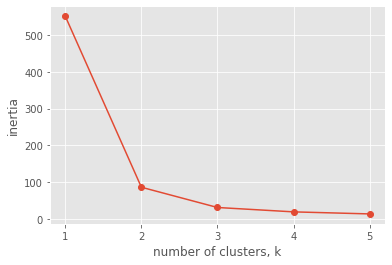

In [44]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(points)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [45]:
scaler=StandardScaler()
kmeans=KMeans(n_clusters=3)
pipeline=make_pipeline(scaler,kmeans)

pipeline.fit(points)
labels=pipeline.predict(points)

df2 = pd.DataFrame({'labels':labels,'species':species})

ct = pd.crosstab(df2['labels'],df2['species'])

# Display ct
print(ct)

species  setsoa  versicolor  virginica
labels                                
0            46           0          2
1             4           0         48
2             0          50          0


In [46]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

pipeline=make_pipeline(normalizer,kmeans)
pipeline.fit(points)

import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(points)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Display df sorted by cluster label
print(df.sort_values('labels'))

     labels     species
149       0      setsoa
43        0  versicolor
59        0   virginica
61        0   virginica
64        0   virginica
..      ...         ...
120       9      setsoa
132       9      setsoa
147       9      setsoa
100       9      setsoa
121       9      setsoa

[150 rows x 2 columns]


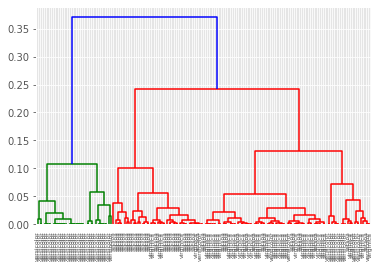

In [50]:
x=points[:,0]
y=points[:,1]

#x_whiten=whiten(points[:,0])
#y_whiten=whiten(points[:,1])

#df_whiten=pd.DataFrame({
#    'x_whiten':x_whiten,
#    'y_whiten':y_whiten
#})

normalized_points=normalize(points)
mergings=linkage(normalized_points,method='complete')

dn=dendrogram(mergings,
labels=species,
leaf_rotation=90,
leaf_font_size=6
#method='ward',
#metric='euclidean'
)

plt.show()

id=np.arange(0,len(x))

df2=pd.DataFrame({'id':id, 'x':x,
'y':y})

df2.set_index('id')


#sns.scatterplot(x='x',y='y', hue='cluster_labels', data=df2)
#sns.scatterplot(x='x',y='y',  data=df2)
plt.show()
